In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/data.csv", encoding="latin1", on_bad_lines="skip", engine="python")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (435742, 13)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
df.columns = df.columns.str.strip().str.upper()
x = df["NO2"].dropna().values
print("Total valid NO2 samples:", len(x))

Total valid NO2 samples: 419509


In [4]:
median = np.median(x)
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3 - q1

if iqr == 0:
    iqr = 1

x_stable = (x - median) / iqr

print("Median:", median)
print("IQR:", iqr)


Median: 22.0
IQR: 18.200000000000003


In [5]:
uni_roll = 102313038
a_r = 0.05 *(uni_roll % 7)
b_r = 0.3*((uni_roll % 5) + 1)
z = x_stable + a_r * np.sin(b_r * x_stable)

print("Transformation parameters:")
print("a_r:", a_r)
print("b_r:", b_r)
print("First 5 transformed values:", z[:5])


Transformation parameters:
a_r: 0.1
b_r: 1.2
First 5 transformed values: [-0.28261406 -0.90772412  0.39870004 -0.44739374 -0.87839493]


In [6]:
mu = np.mean(z)
variance = np.var(z)
sigma = np.sqrt(variance)
lambda_param = 1 / (2 * variance)
c = 1 / (np.sqrt(2 * np.pi) * sigma)

print("\nLearned Parameters:")
print("mu =", mu)
print("variance =", variance)
print("lambda =", lambda_param)
print("c =", c)




Learned Parameters:
mu = 0.20899804629409047
variance = 1.1050136593206283
lambda = 0.4524830944690803
c = 0.37951263786670186


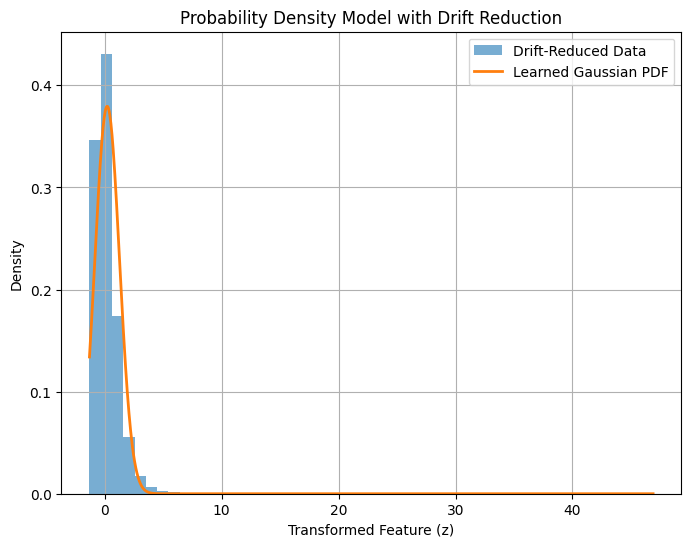


Summary Statistics:
Mean: 0.20899804629409047
Std Dev: 1.0511962991376198
Min: -1.3080691139411191
Max: 46.89921192192281


In [7]:
plt.figure(figsize=(8,6))

plt.hist(z, bins=50, density=True, alpha=0.6, label="Drift-Reduced Data")

z_range = np.linspace(min(z), max(z), 1000)
pdf = c * np.exp(-lambda_param * (z_range - mu)**2)

plt.plot(z_range, pdf, linewidth=2, label="Learned Gaussian PDF")

plt.title("Probability Density Model with Drift Reduction")
plt.xlabel("Transformed Feature (z)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

plt.show()

print("\nSummary Statistics:")
print("Mean:", np.mean(z))
print("Std Dev:", np.std(z))
print("Min:", np.min(z))
print("Max:", np.max(z))

